In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import numpy as np
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

In [65]:
#charger les donnees
data = pd.read_csv('Patients_hopital.csv', sep=';', index_col=0)

In [66]:
# Afficher les premières lignes du dataframe
print(data.head())

                     GENRE  AGE  TAILLE  POIDS  TTAILLE  SYS  DIA   IMC  JMBG  \
Identifiant_patient                                                             
I0001                    0   58   179.8   76.7     90.6  125   78  23.8  42.5   
I0002                    0   22   168.1   65.4     78.1  107   54  23.2  40.2   
I0003                    0   32   182.1   81.3     96.5  126   81  24.6  44.4   
I0004                    0   31   174.5   79.7     87.7  110   68  26.2  42.8   
I0005                    0   28   171.7   69.2     87.1  110   66  23.5  40.0   

                     COUD  POIGN  BRAS  
Identifiant_patient                     
I0001                 7.7    6.4  31.9  
I0002                 7.6    6.2  31.0  
I0003                 7.3    5.8  32.7  
I0004                 7.5    5.9  33.4  
I0005                 7.1    6.0  30.1  


In [67]:
print(data.shape)

(80, 12)


In [68]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, I0001 to I0080
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GENRE    80 non-null     int64  
 1   AGE      80 non-null     int64  
 2   TAILLE   80 non-null     float64
 3   POIDS    80 non-null     float64
 4   TTAILLE  80 non-null     float64
 5   SYS      80 non-null     int64  
 6   DIA      80 non-null     int64  
 7   IMC      80 non-null     float64
 8   JMBG     80 non-null     float64
 9   COUD     80 non-null     float64
 10  POIGN    80 non-null     float64
 11  BRAS     80 non-null     float64
dtypes: float64(8), int64(4)
memory usage: 8.1+ KB
None


In [69]:
# Calculer les statistiques descriptives 
desc_stats = data.describe()
print(desc_stats)

           GENRE        AGE      TAILLE       POIDS     TTAILLE         SYS  \
count  80.000000  80.000000   80.000000   80.000000   80.000000   80.000000   
mean    0.500000  34.350000  167.040000   72.292500   88.158750  114.850000   
std     0.503155  13.175639    9.803882   15.816637   13.229108   14.671163   
min     0.000000  12.000000  144.800000   42.800000   66.700000   89.000000   
25%     0.000000  23.750000  160.225000   61.200000   76.725000  107.000000   
50%     0.500000  32.000000  168.000000   73.000000   87.700000  113.000000   
75%     1.000000  42.500000  173.500000   81.375000   97.325000  124.000000   
max     1.000000  73.000000  193.500000  116.100000  126.500000  181.000000   

              DIA        IMC      JMBG       COUD      POIGN       BRAS  
count   80.000000  80.000000  80.00000  80.000000  80.000000  80.000000  
mean    70.325000  25.868750  40.71750   6.835000   5.433750  31.272500  
std     10.790027   4.959216   3.83712   0.710874   0.501881   4.3

<Figure size 1200x800 with 0 Axes>

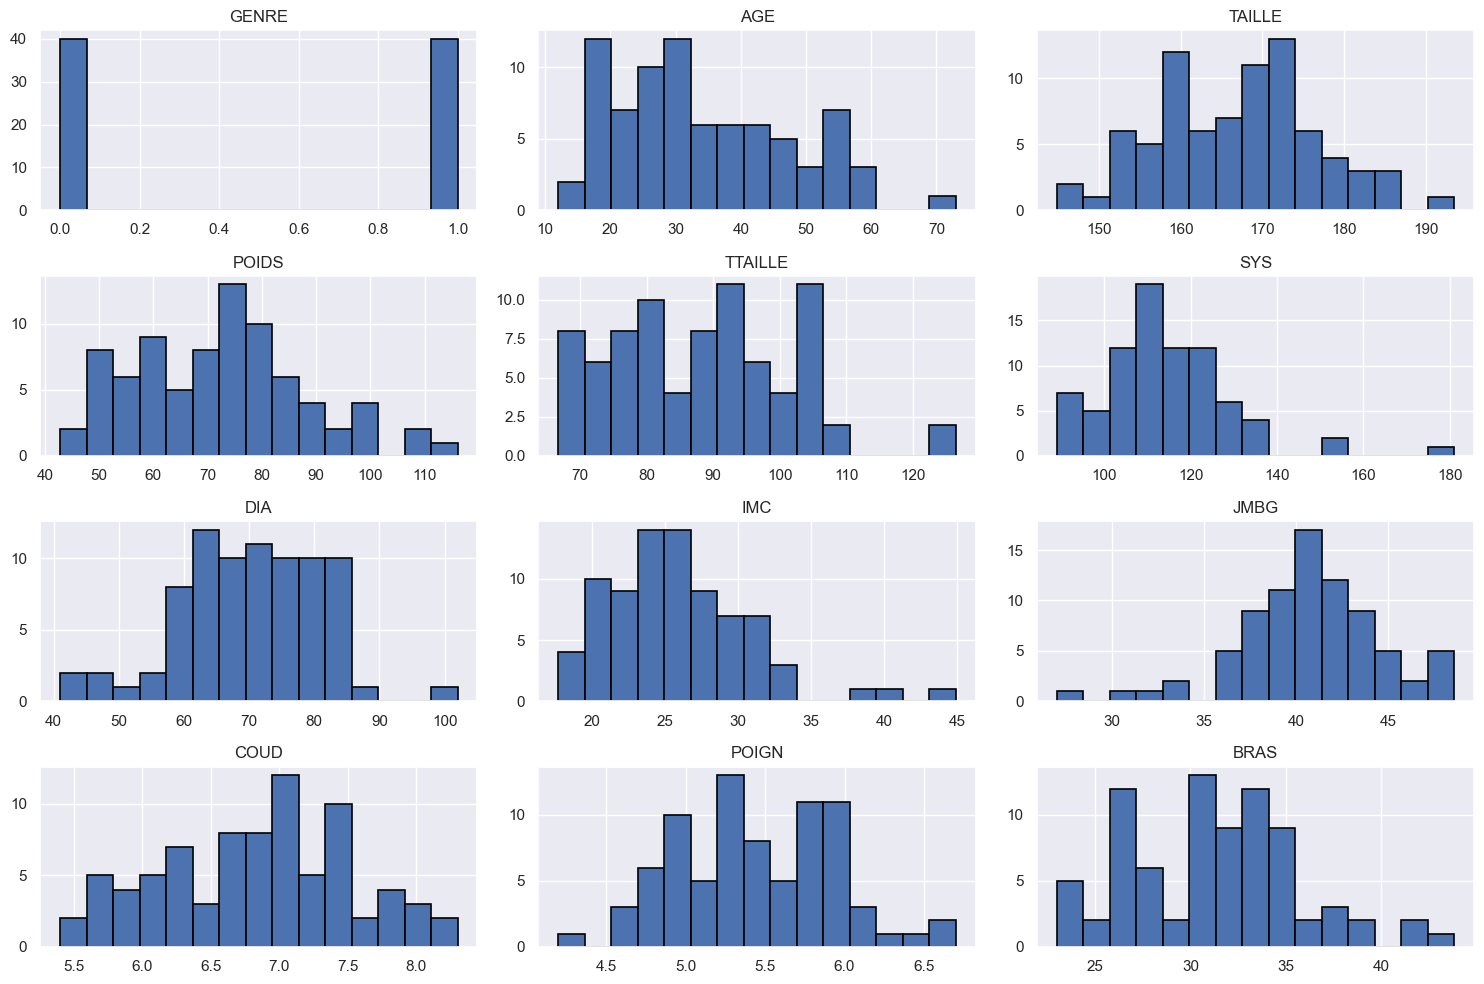

In [70]:
# Visualiser la distribution des données pour chaque caractéristique 
plt.figure(figsize=(12, 8)) 
data.hist(bins=15, edgecolor='black', linewidth=1.2, figsize=(15, 10)) 
plt.tight_layout() 
plt.show()

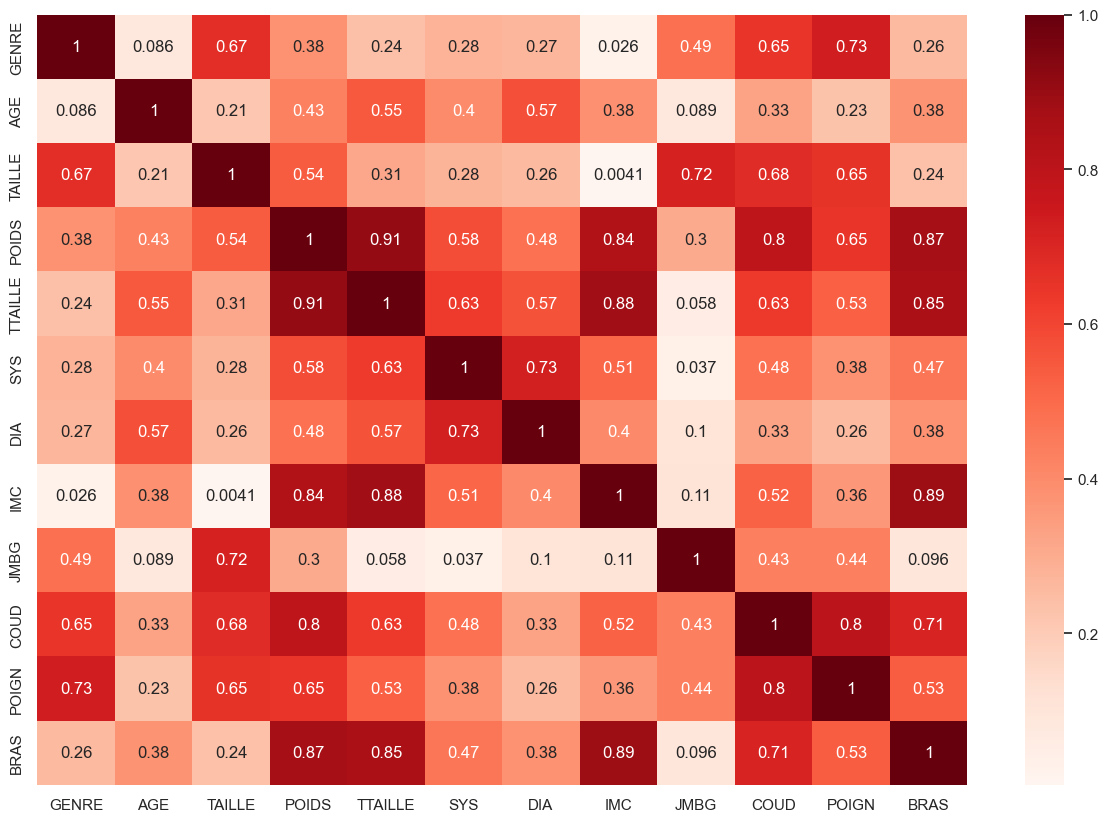

In [71]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr().abs(), annot=True, cmap='Reds')
plt.show()

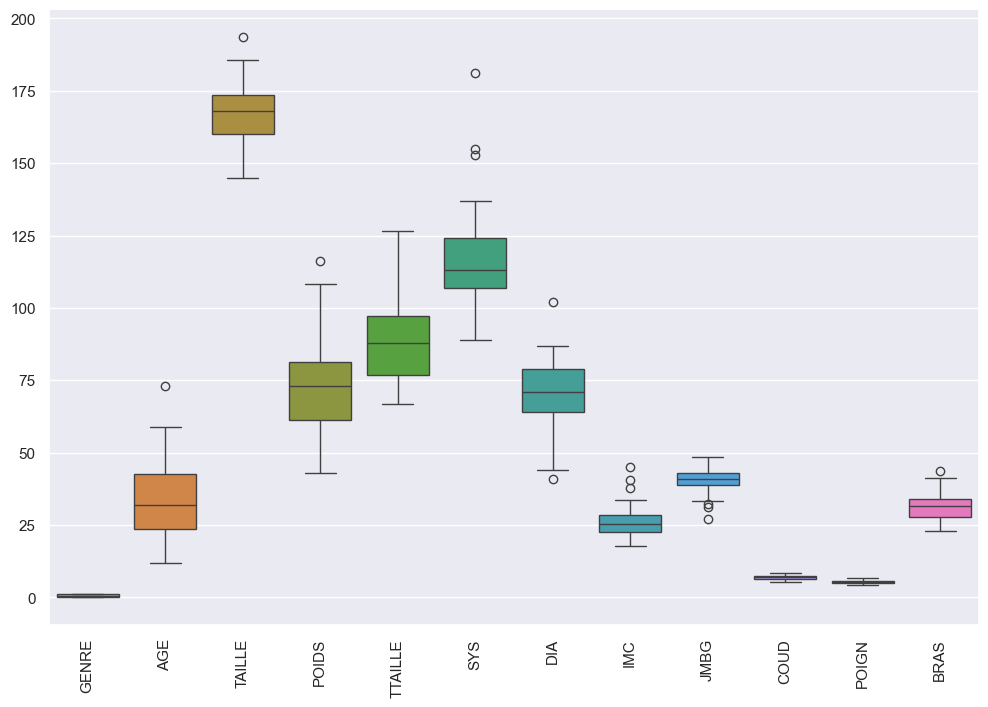

In [72]:
# Créer des boxplots pour détecter les valeurs aberrantes 
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=data)
plt.xticks(rotation=90) 
plt.show()

In [73]:
#drop_outlier
for col in data.columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]
  data.reset_index(drop=True, inplace=True)


In [74]:
correlation_matrix = data.corr().abs()
print(correlation_matrix['POIDS'])

GENRE      0.522893
AGE        0.403420
TAILLE     0.676615
POIDS      1.000000
TTAILLE    0.890077
SYS        0.521441
DIA        0.464747
IMC        0.829549
JMBG       0.558681
COUD       0.807266
POIGN      0.702354
BRAS       0.878033
Name: POIDS, dtype: float64


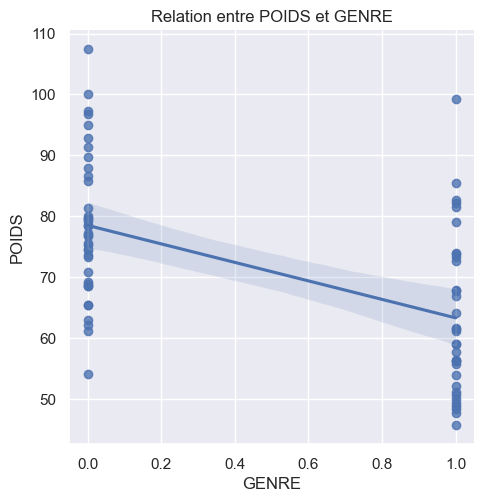

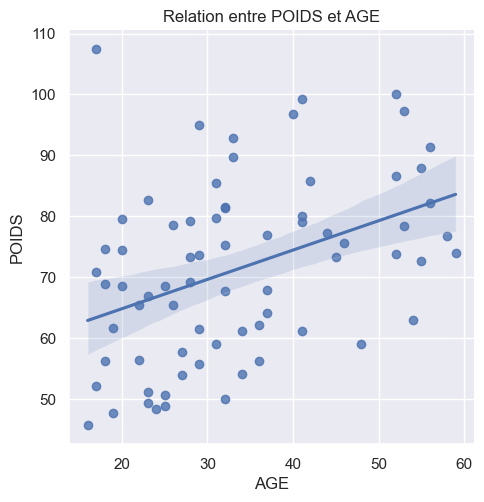

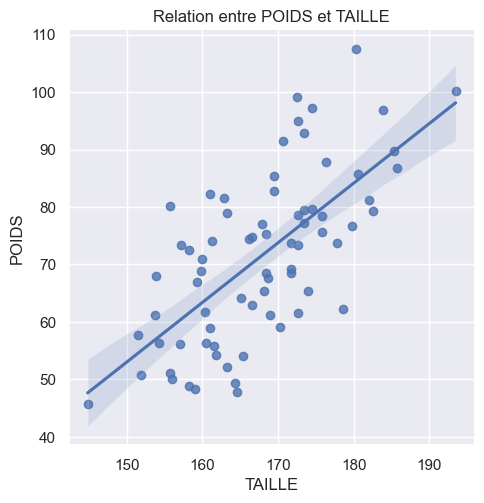

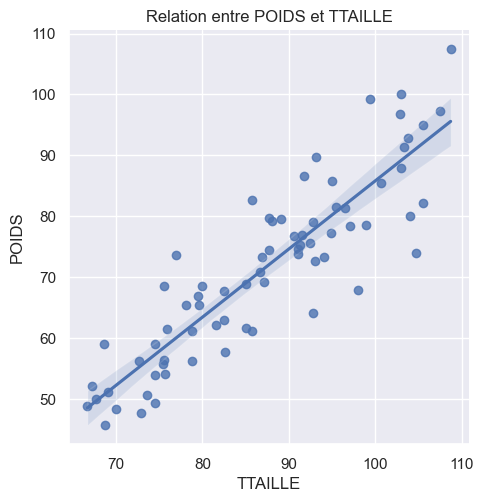

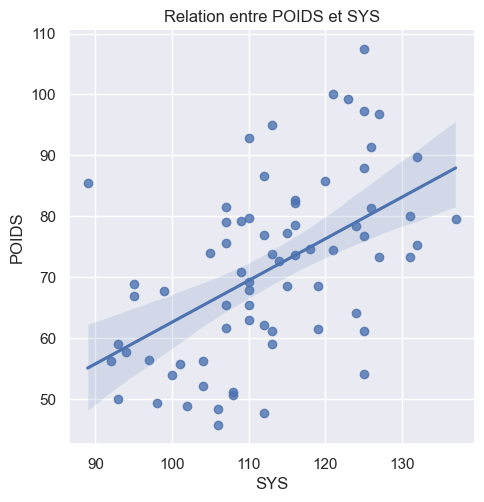

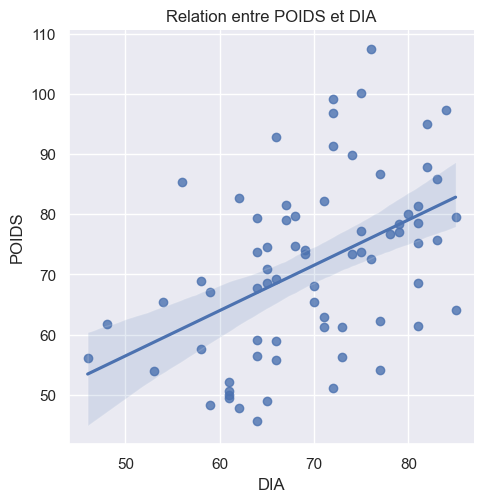

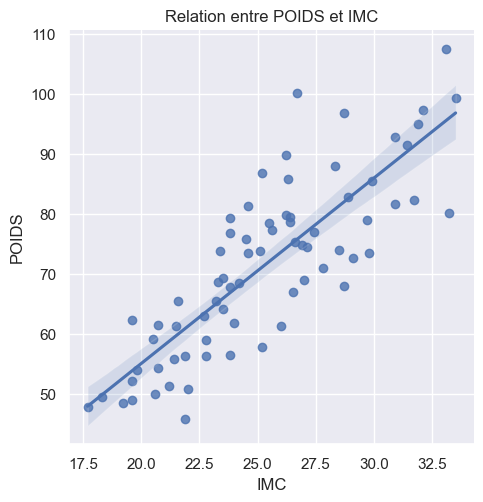

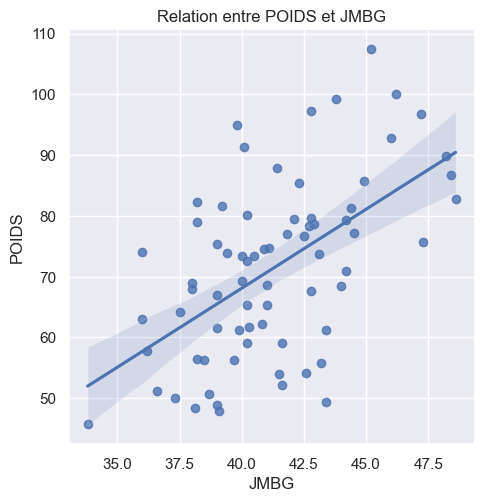

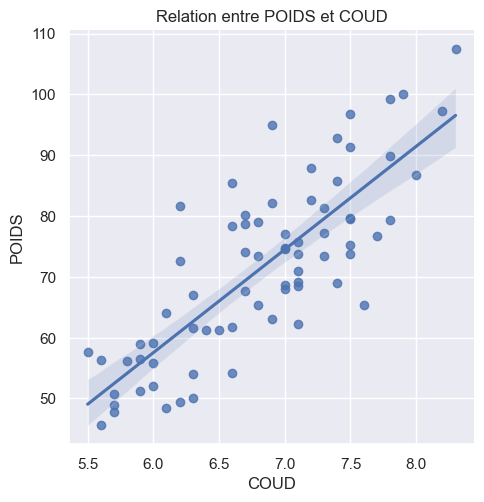

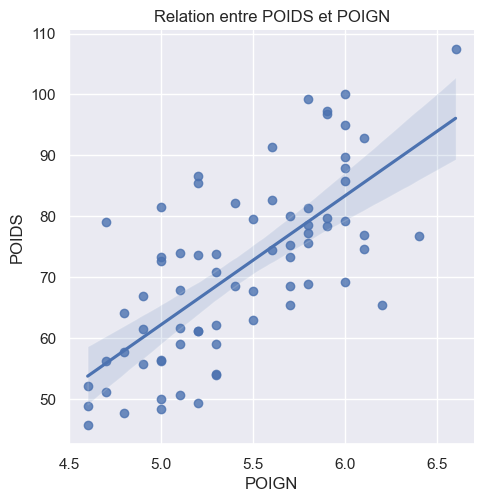

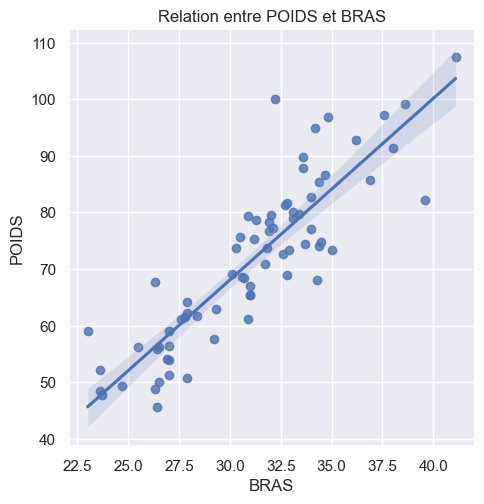

In [75]:
# Créer des scatter plots pour visualiser les relations 
for column in data.columns:
   if column != 'POIDS':
      sns.lmplot(x=column, y='POIDS', data=data) 
      plt.title(f'Relation entre POIDS et {column}')
      plt.show()

In [76]:
# Variables explicatives significatives (par exemple, 'AGE', 'TAILLE') 
X = data.drop(columns=['POIDS'])
y = data['POIDS'] 
# Ajouter une constante (intercept) au modèle 
X = sm.add_constant(X)
# Ajuster le modèle de régression linéaire
model = sm.OLS(y, X).fit()
# Résumé du modèle 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  POIDS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     950.4
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           6.00e-63
Time:                        14:32:31   Log-Likelihood:                -108.64
No. Observations:                  72   AIC:                             241.3
Df Residuals:                      60   BIC:                             268.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -147.6373      4.365    -33.820      0.0

In [77]:
# Calcul des corrélations entre l'IMC et le poids 
correlation_imc_weight = data[['IMC', 'POIDS']].corr()
print(correlation_imc_weight)

            IMC     POIDS
IMC    1.000000  0.829549
POIDS  0.829549  1.000000


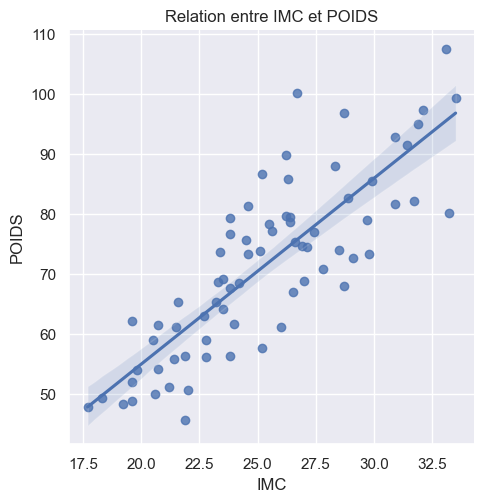

In [78]:
# Créer un scatter plot pour visualiser la relation entre l'IMC et le poids 
sns.lmplot(x='IMC', y='POIDS', data=data)
plt.title('Relation entre IMC et POIDS') 
plt.show()

In [79]:
# Variables explicatives (IMC) 
X = data[['IMC']] 
y = data['POIDS'] 
# Ajouter une constante (intercept) au modèle 
X = sm.add_constant(X) 
# Ajuster le modèle de régression linéaire 
model = sm.OLS(y, X).fit()
# Résumé du modèle 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  POIDS   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     154.5
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           2.21e-19
Time:                        14:32:31   Log-Likelihood:                -252.68
No. Observations:                  72   AIC:                             509.4
Df Residuals:                      70   BIC:                             513.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8583      6.367     -1.077      0.2

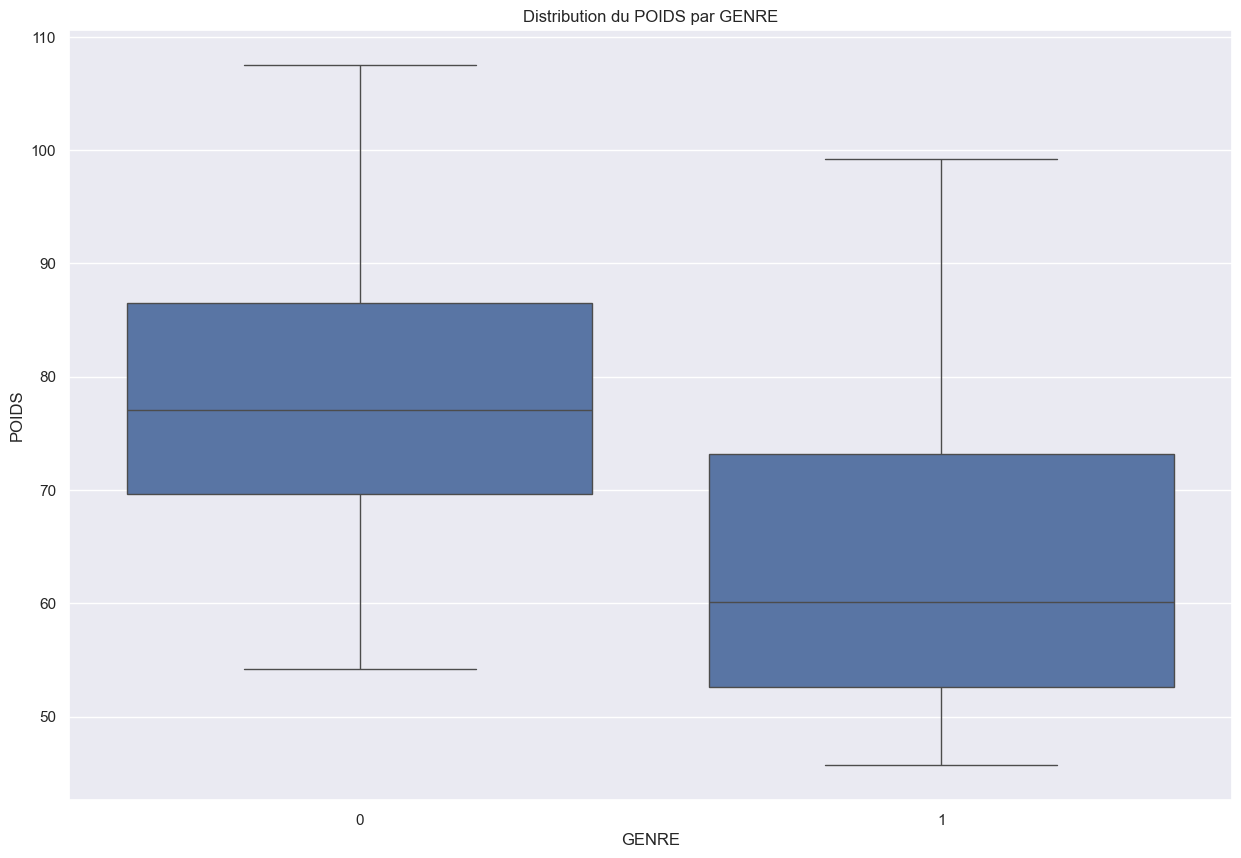

                sum_sq    df          F    PR(>F)
C(GENRE)   4130.276939   1.0  26.341336  0.000002
Residual  10975.881811  70.0        NaN       NaN


In [80]:
# Créer un boxplot pour visualiser la distribution du poids par genre 
sns.boxplot(x='GENRE', y='POIDS', data=data) 
plt.title('Distribution du POIDS par GENRE') 
plt.show()  
# Ajuster un modèle de régression avec le genre comme variable explicative 
model_anova = ols('POIDS ~ C(GENRE)', data=data).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2) 
print(anova_table)

In [81]:
# Variables explicatives et cible
X = data.drop(columns=['POIDS'])
y = data['POIDS'] 
# Ajouter une constante
X = sm.add_constant(X) 
# Modèle de régression linéaire
lm = LinearRegression()
# Sélection de variables avec RFE (Recursive Feature Elimination) 
selector = RFE(lm, n_features_to_select=3)
selector = selector.fit(X, y) 
# Résumé des résultats de la sélection
ranking = selector.ranking_
features = X.columns 
selected_features = [features[i] for i in range(len(features)) if ranking[i] == 1] 
print("Selected features:", selected_features) 
# Variables explicatives sélectionnées 
X_selected = data[selected_features] 
# Ajouter une constante 
X_selected = sm.add_constant(X_selected) 
# Ajuster le modèle de régression linéaire
model = sm.OLS(y, X_selected).fit() 
# Résumé du modèle
print(model.summary()) 
# Modèle complet avec toutes les variables
model_full = sm.OLS(y, X).fit()
# Critères de comparaison
print(f"R² ajusté (modèle complet): {model_full.rsquared_adj}") 
print(f"AIC (modèle complet): {model_full.aic}")
print(f"BIC (modèle complet): {model_full.bic}")

print(f"R² ajusté (modèle sélectionné): {model.rsquared_adj}") 
print(f"AIC (modèle sélectionné): {model.aic}")
print(f"BIC (modèle sélectionné): {model.bic}")

Selected features: ['TAILLE', 'IMC', 'POIGN']
                            OLS Regression Results                            
Dep. Variable:                  POIDS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3604.
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           7.62e-75
Time:                        14:32:31   Log-Likelihood:                -111.92
No. Observations:                  72   AIC:                             231.8
Df Residuals:                      68   BIC:                             241.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

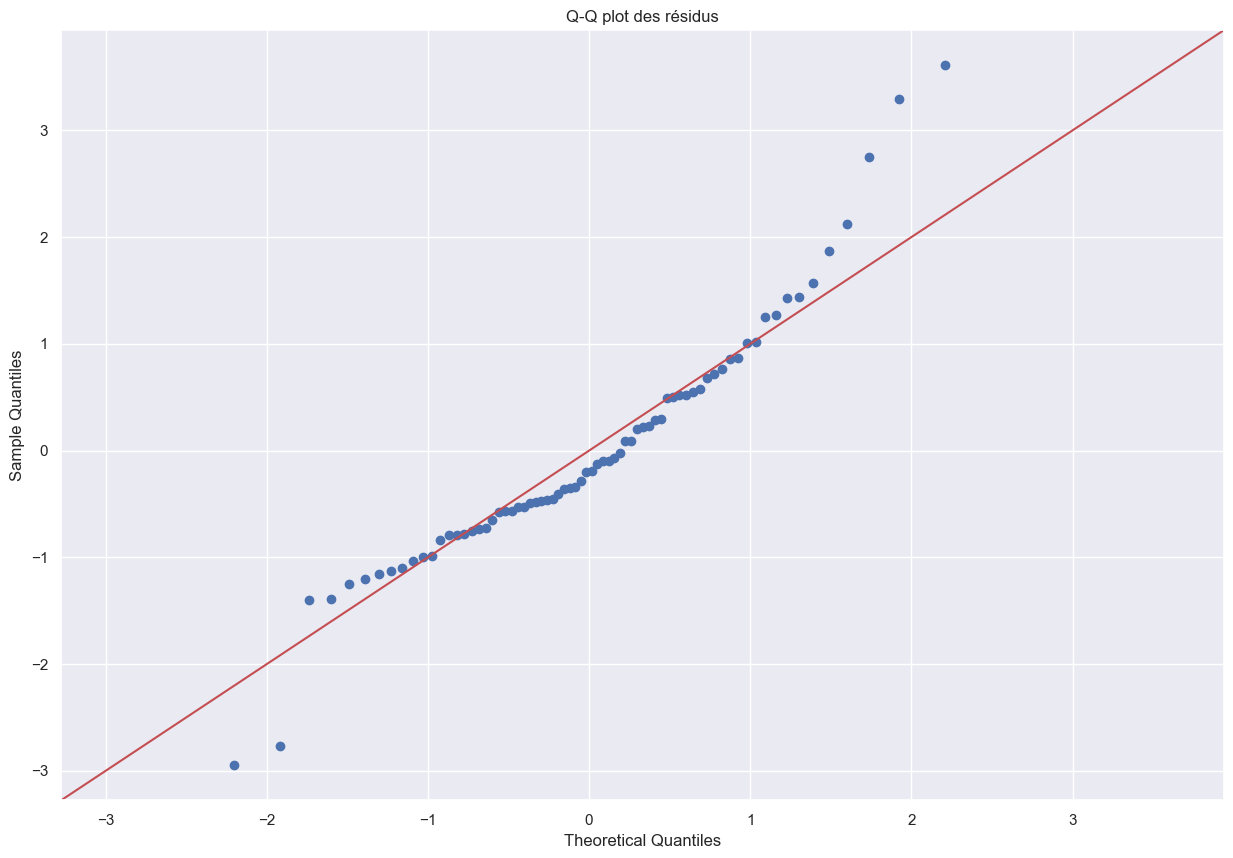

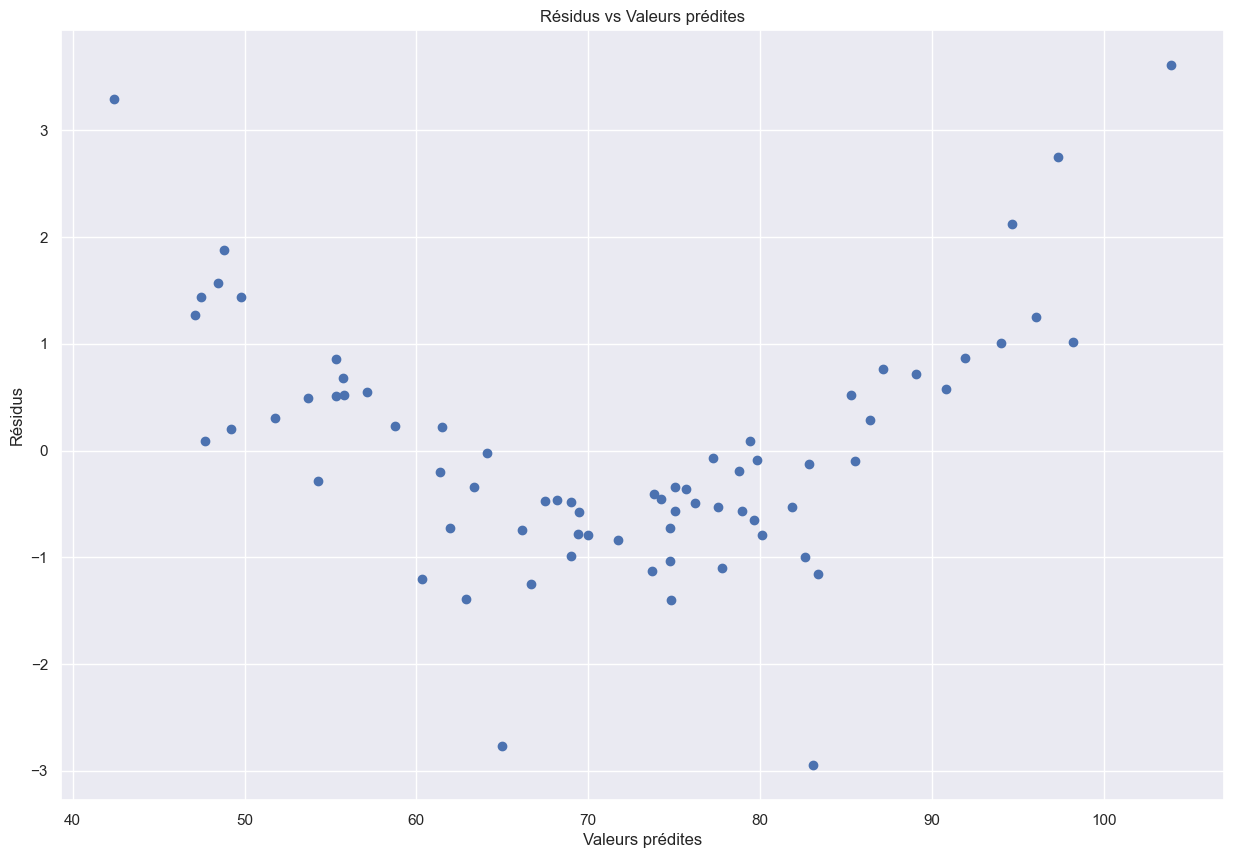

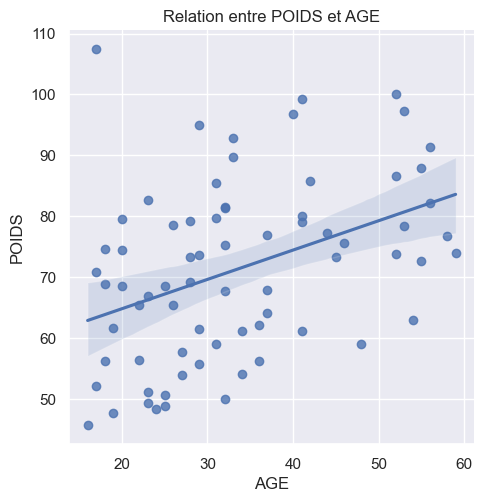

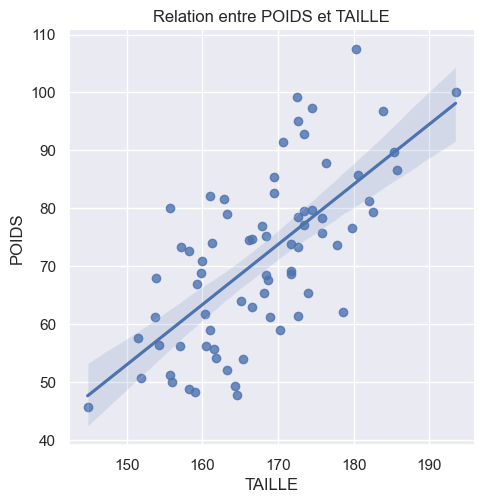

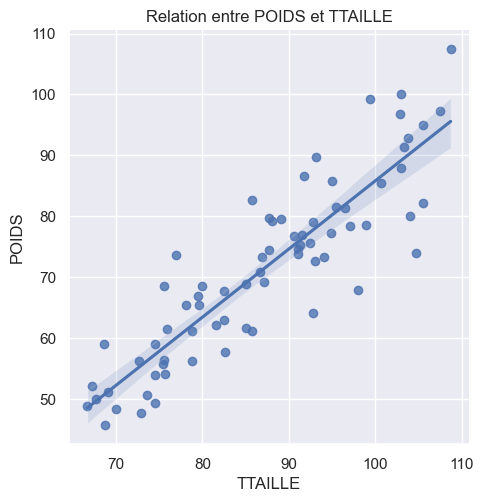

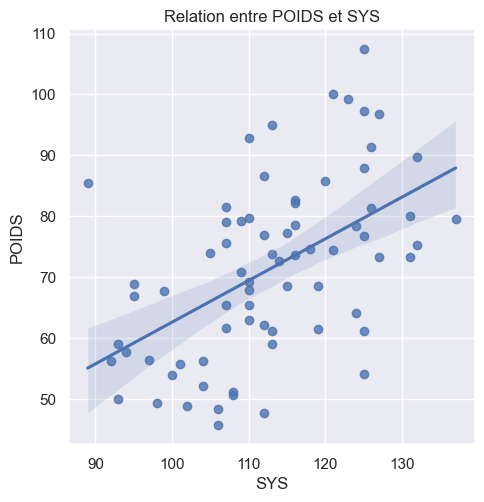

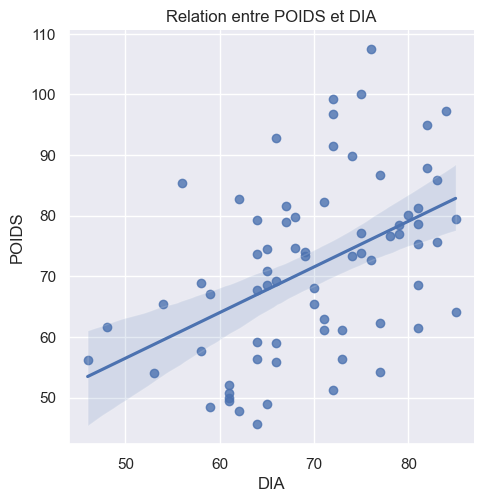

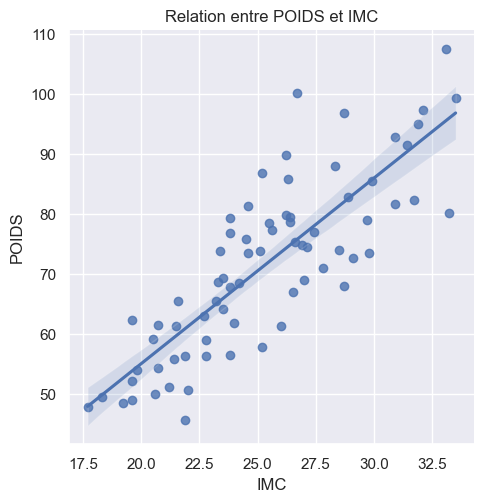

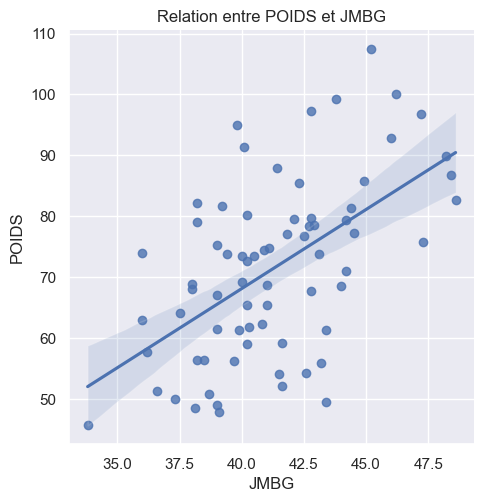

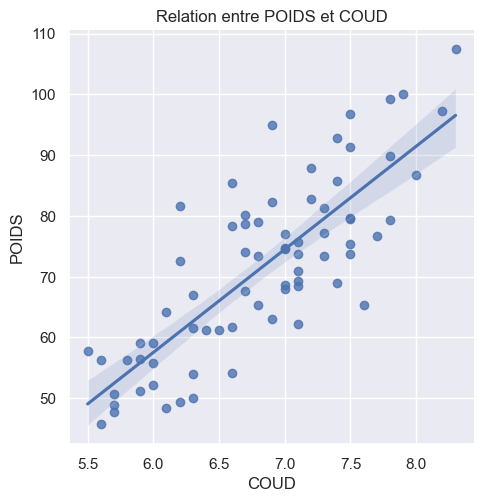

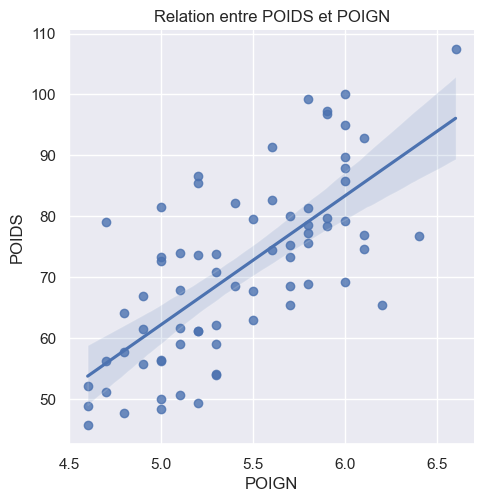

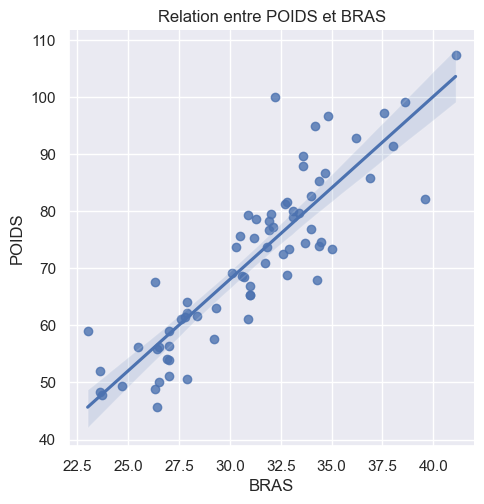

Test de Durbin-Watson: 2.252838027030586
Statistic: 0.9474275728797777, p-value: 0.004558211572143293
Les résidus ne suivent pas une distribution normale (hypothèse rejetée).
Scores de validation croisée: [0.98919855 0.97082332 0.99407192 0.9947426  0.97897199]
Moyenne des scores de validation croisée: 0.9855616750409814


In [82]:
# Vérification de la normalité des résidus 
residuals = model.resid 
sm.qqplot(residuals, line='45') 
plt.title('Q-Q plot des résidus') 
plt.show() 
# Vérification de l'homoscédasticité des résidus 
plt.scatter(model.fittedvalues, residuals) 
plt.xlabel('Valeurs prédites') 
plt.ylabel('Résidus') 
plt.title('Résidus vs Valeurs prédites') 
plt.show() 
# Vérification de la linéarité 
variables = ['AGE', 'TAILLE', 'TTAILLE', 'SYS', 'DIA', 'IMC', 'JMBG', 'COUD', 'POIGN', 'BRAS']
for var in variables:
     sns.lmplot(x=var, y='POIDS', data=data) 
     plt.title(f'Relation entre POIDS et {var}')
     plt.show()
# Calcul du test de Durbin-Watson
dw = durbin_watson(model.resid) 
print(f"Test de Durbin-Watson: {dw}")
# Test de Shapiro-Wilk pour vérifier la normalité des résidus 
stat, p_value = shapiro(residuals)
print(f'Statistic: {stat}, p-value: {p_value}')
# Interprétation du test de Shapiro-Wilk
if p_value > 0.05:
    print("Les résidus suivent une distribution normale (hypothèse acceptée).")
else:
    print("Les résidus ne suivent pas une distribution normale (hypothèse rejetée).")
# Variables explicatives et cible 
X = data[selected_features] 
y = data['POIDS'] 
# Modèle de régression linéaire 
lm = LinearRegression() 
# Validation croisée 
scores = cross_val_score(lm, X, y, cv=5, scoring='r2') 
print(f'Scores de validation croisée: {scores}') 
print(f'Moyenne des scores de validation croisée: {np.mean(scores)}')